<a href="https://colab.research.google.com/github/BeverlyHuang/heart_disease/blob/master/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Classification

##Framework

![](https://raw.githubusercontent.com/BeverlyHuang/heart_disease/master/ds_process_model.png)

#Business Understanding

* Predicting the presence of heart disease in the patient based on available medical records
* Enabling the healthcare organization to develop proactive medical interventions for the patient

#Data Understanding

* Data Sources: Heart disease data set from UCI machine learning repository
* The original data set is collected from locations: Cleveland Clinic Foundation, Hungarian Institute of Cardiology, Budapest, V.A. Medical Center, Long Beach, CA, University Hospital, Zurich, Switzerland
* Features: Age, sex, chest pain type, serum cholesterol, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate, exercise induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, thal

#Data Preparation

###Import Packages

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

###Load Data

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/BeverlyHuang/heart_disease/master/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###Seperate features and target

In [0]:
X=df.drop('target',axis=1)
y=df['target']

###Train/Test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

#Modeling & Evaluation

##Model 1: Logistics Regression

###Default model result

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test,y_test)

0.8461538461538461

### Set up hyperparameter grid

In [0]:
c_space = np.logspace(-5,8,15)
param_grid = {'C': c_space}

### GridSearch for best parameters

In [0]:
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)
logreg_cv.fit(X_train,y_train)
logreg_cv.best_params_

{'C': 0.4393970560760795}

###Use the best parameters to predict

In [0]:
y_pred = logreg_cv.predict(X_test)
logreg_cv.score(X_test,y_test)

0.8571428571428571

###Confusion matrix

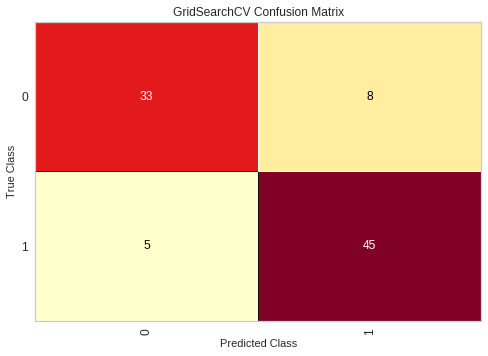

In [0]:
cm = ConfusionMatrix(logreg_cv, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

###Classfication report

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

   micro avg       0.86      0.86      0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



###ROC AUC

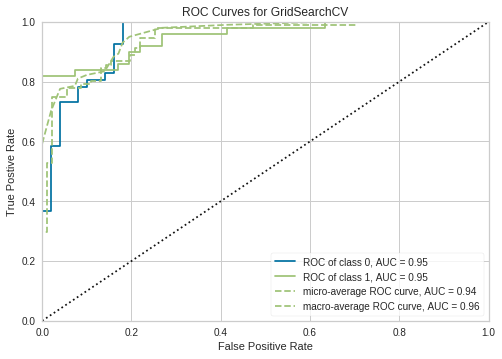

In [0]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(logreg_cv)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

###Performance Interpretation 

* Using logistics regression, the best model achieves 85.71% accuracy 
* False positives (type I error) means the patient does not have heart disease while our predicted result indicates that the patient does have disease. False negatives (type II error) means the patient has heart disease while our predicted result indicates that the patient does not have disease. 
* In this case, false negatives are more serious because we fail to identify heart disease patients. So we want to minimize false negatives, i.e. maximize recall (Σ True positive/Σ Condition positive)
* Here, recall =  0.9. The model can identify 90% heart disease patients correctly

##Model 2: SVM

###Default model result

In [0]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm.score(X_test,y_test)

0.5494505494505495

### Set up hyperparameter grid

In [0]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

### GridSearch for best parameters

In [0]:
svm = SVC(kernel='rbf')
svm_cv = GridSearchCV(svm, param_grid, cv=10)
svm_cv.fit(X, y)
svm_cv.best_params_

{'C': 10, 'gamma': 0.001}

###Use the best parameters to predict

In [0]:
y_pred = svm_cv.predict(X_test)
svm_cv.score(X_test,y_test)

0.7252747252747253

###Confusion matrix

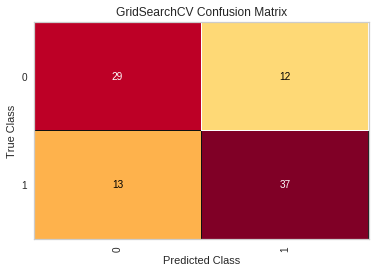

In [0]:
cm = ConfusionMatrix(svm_cv, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

###Classfication report

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        41
           1       0.76      0.74      0.75        50

   micro avg       0.73      0.73      0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91



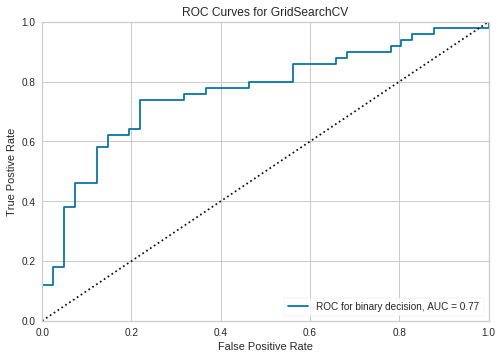

In [0]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(svm_cv, micro=False, macro=False, per_class=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

###Performance Interpretation 

* Using SVM, the best model achieves 72.53% accuracy 
* Here, recall =  0.74. The model can identify 74% heart disease patients correctly

##Model 3: Random Forest

###Default model result

In [0]:
rfc=RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.8241758241758241

### Set up hyperparameter grid

In [0]:
param_grid = {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(3,10),
    'min_samples_leaf': np.arange(2,8),
    'criterion' :['gini', 'entropy']}

### GridSearch for best parameters

In [0]:
rfc=RandomForestClassifier(random_state=1)
rfc_cv = RandomizedSearchCV(rfc, param_grid, cv=10)
rfc_cv.fit(X_train, y_train)
rfc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 500}

###Use the best parameters to predict

In [0]:
y_pred = rfc_cv.predict(X_test)
rfc_cv.score(X_test,y_test)

0.8571428571428571

###Confusion matrix

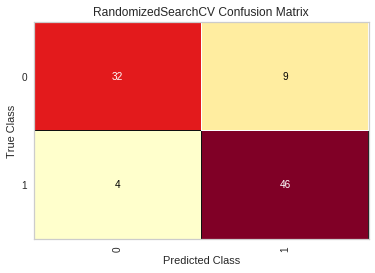

In [0]:
cm = ConfusionMatrix(rfc_cv, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

###Classfication report

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.84      0.92      0.88        50

   micro avg       0.86      0.86      0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



###ROC AUC

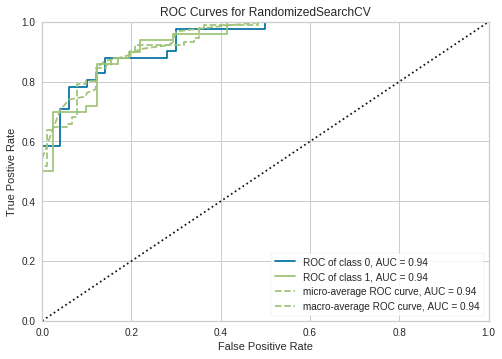

In [0]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(rfc_cv)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

###Performance Interpretation 

* Using random forest, the best model achieves 85.71% accuracy 
* Here, recall =  0.92. The model can identify 92% heart disease patients correctly

##Model 4: AutoML Using TPOT

###Install TPOT

In [0]:
!pip install tpot

     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 942kB 15.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built deap stopit


### Find the best model

In [0]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10)
tpot.fit(X_train, y_train)

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=10,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=100,
        random_state=None, scoring=None, subsample=1.0,
        template='RandomTree', use_dask=False, verbosity=0,
        warm_start=False)

###Use the best model to predict

In [0]:
y_pred = tpot.predict(X_test)
tpot.score(X_test,y_test)

0.8461538461538461

###Classfication report

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.88      0.84      0.86        50

   micro avg       0.85      0.85      0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [0]:
fpr,tpr,threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)

<Figure size 432x288 with 0 Axes>

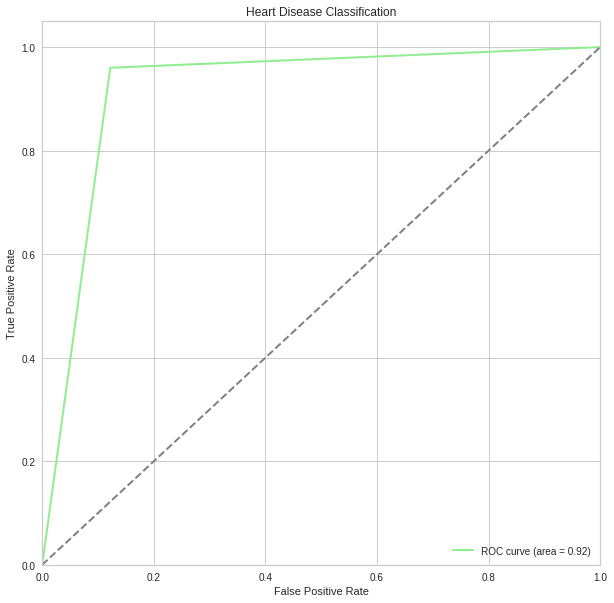

In [0]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='lightgreen',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart Disease Classification')
plt.legend(loc="lower right")
plt.show()

###Performance Interpretation 

* Using Auto ML, the model achieves 84.62% accuracy 
* Here, recall =  0.84. The model can identify 84% heart disease patients correctly
* The Auto ML model performs better than SVM but worse than Logistic Regression and Random Forest in terms of recall

#Deployment

* In this project, we build classification machine learning models in Python using Heart Disease dataset.
* Four classification models (LogisticRegression, SVM, RandomForest, Auto ML) are evaluated in terms of accuracy, confusion matrix, precision, recall and ROC AUC. 
* From business impact viewpoint, we choose recall as the most important metric. 
* The modeling and evaluation results show that Auto ML model performs better than SVM but worse than Logistic Regression and Random Forest in terms of recall.
* Random Forest Model with GridSearch has the highest recall of 0.92. This means the model can identify 92% heart disease patients correctly.
* Deploying this model has the potential to predict the presence of heart disease in the patient with high accuracy and enable the healthcare organization to develop proactive medical interventions for the patient.